In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [54]:
def createModel(input_shape):
    model = Sequential()
    
    model.add(Conv2D(32, (3,3), padding="same", activation="relu", input_shape=input_shape))
    model.add(Dropout(0.25))
    
    model.add(Flatten())
    
    model.add(Dense(50, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation="sigmoid"))
    
    return model

In [36]:
from tensorflow.keras.datasets import cifar10

## load the data

In [37]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [38]:
print(X_train.shape)

(50000, 32, 32, 3)


In [39]:
print(X_train.shape[0])

50000


In [40]:
print(X_test.shape[0])

10000


In [41]:
print(y_test.shape[0])

10000


In [42]:
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

print(y_test[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


## look at data

In [43]:
%matplotlib inline

In [44]:
import matplotlib.pyplot as plt
import numpy as np

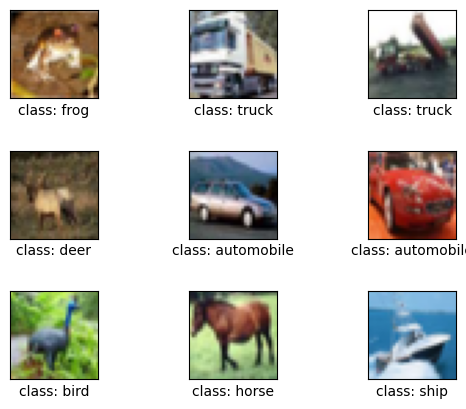

In [45]:
class_names = ["airplane","automobile","bird","cat","deer",
               "dog","frog","horse","ship","truck"]

fig, axes = plt.subplots(3,3)
fig.subplots_adjust(hspace=0.6, wspace=0.3)

for i, ax in enumerate(axes.flat):
    ax.imshow(X_train[i])
    
    xlabel = "class: {0}".format(class_names[y_train[i].argmax()])
    
    ax.set_xlabel(xlabel)
    
    ax.set_xticks([])
    ax.set_yticks([])

In [46]:
X_train = X_train.astype("float32")
X_test = X_test.astype("float32")

X_train /= 255
X_test /= 255

In [47]:
opt = tf.keras.optimizers.legacy.RMSprop(lr=0.0001, decay=1e-6)

In [55]:
model = createModel(X_train.shape[1:])

model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [56]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 dropout_8 (Dropout)         (None, 32, 32, 32)        0         
                                                                 
 flatten_4 (Flatten)         (None, 32768)             0         
                                                                 
 dense_8 (Dense)             (None, 50)                1638450   
                                                                 
 dropout_9 (Dropout)         (None, 50)                0         
                                                                 
 dense_9 (Dense)             (None, 6)                 306       
                                                                 
Total params: 1639652 (6.25 MB)
Trainable params: 1639

In [58]:


model.fit(X_train, y_train,
          batch_size=32,
          epochs=2,
          validation_data=(X_test, y_test),
          shuffle=True)



Epoch 1/2


InvalidArgumentError: Graph execution error:

Detected at node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\anaconda3\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\kernelapp.py", line 736, in start

  File "C:\Users\anaconda3\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\anaconda3\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\anaconda3\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\anaconda3\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 516, in dispatch_queue

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 505, in process_one

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 412, in dispatch_shell

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\kernelbase.py", line 740, in execute_request

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\ipkernel.py", line 422, in do_execute

  File "C:\Users\anaconda3\Lib\site-packages\ipykernel\zmqshell.py", line 546, in run_cell

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3024, in run_cell

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3079, in _run_cell

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3284, in run_cell_async

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3466, in run_ast_nodes

  File "C:\Users\anaconda3\Lib\site-packages\IPython\core\interactiveshell.py", line 3526, in run_code

  File "C:\Users\Amit Gali\AppData\Local\Temp\ipykernel_15048\3800369510.py", line 5, in <module>

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 65, in error_handler

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1783, in fit

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1377, in train_function

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1360, in step_function

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1349, in run_step

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1127, in train_step

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 1185, in compute_loss

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\engine\compile_utils.py", line 277, in __call__

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\losses.py", line 143, in __call__

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\losses.py", line 270, in call

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\losses.py", line 2454, in sparse_categorical_crossentropy

  File "C:\Users\anaconda3\Lib\site-packages\keras\src\backend.py", line 5777, in sparse_categorical_crossentropy

logits and labels must have the same first dimension, got logits shape [32,6] and labels shape [320]
	 [[{{node sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_train_function_2995]